## Heart Disease Classification
dataset: https://archive.ics.uci.edu/dataset/45/heart+disease

In [1]:
pip install ucimlrepo

In [48]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
import tensorflow
import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [49]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
features = heart_disease.data.features
classification = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

## Data Preprocessing

In [50]:
print(features.head())
print(classification.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
   num
0    0
1    2
2    1
3    0
4    0


In [51]:
#Converting to a binary classification problem

classification = classification.replace(2, 1)
print(classification.head())

   num
0    0
1    1
2    1
3    0
4    0


In [52]:
#Check for missing data
features.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [53]:
null_list = np.where(features.isnull())[0]
print(null_list)

[ 87 166 192 266 287 302]


In [54]:
#Replace missing data
features = features.dropna()
classification.drop(index=null_list, inplace=True)
print(len(classification))
features.isnull().sum()

297


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

## Logistic Regression

In [55]:
X_train, X_test, y_train, y_test = train_test_split(features, classification, test_size=0.1, random_state=24)

model = LogisticRegression(max_iter=5000, solver='lbfgs')

train_acc = model.fit(X_train, y_train.to_numpy().flatten())
test_acc = model.score(X_test, y_test)

print(f'test acc - : {test_acc:.3f}')

test acc - : 0.667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Trees


In [56]:
X_train, X_test, y_train, y_test = train_test_split(features, classification, test_size=0.1, random_state=24)
decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.44803370786516855, 0.9583333333333334, 'x[12] <= 4.5\ngini = 0.596\nsamples = 267\nvalue = [147, 78, 31, 11]'),
 Text(0.2148876404494382, 0.875, 'x[11] <= 0.5\ngini = 0.37\nsamples = 150\nvalue = [116, 26, 6, 2]'),
 Text(0.10112359550561797, 0.7916666666666666, 'x[9] <= 2.8\ngini = 0.191\nsamples = 103\nvalue = [92, 11, 0, 0]'),
 Text(0.06741573033707865, 0.7083333333333334, 'x[0] <= 57.5\ngini = 0.149\nsamples = 99\nvalue = [91, 8, 0, 0]'),
 Text(0.033707865168539325, 0.625, 'x[3] <= 109.0\ngini = 0.029\nsamples = 68\nvalue = [67, 1, 0, 0]'),
 Text(0.02247191011235955, 0.5416666666666666, 'x[1] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1, 0, 0]'),
 Text(0.011235955056179775, 0.4583333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]'),
 Text(0.033707865168539325, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.0449438202247191, 0.5416666666666666, 'gini = 0.0\nsamples = 63\nvalue = [63, 0, 0, 0]'),
 Text(0.10112359550561797, 0.625, 'x[

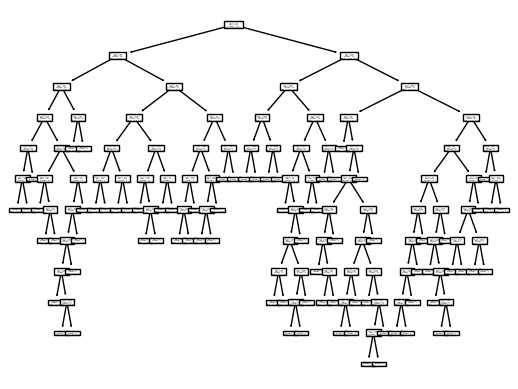

In [57]:
tree.plot_tree(decisionTree)

In [58]:
decisionTreeAcc = decisionTree.score(X_test, y_test)
print(f'accuracy - : {decisionTreeAcc:.3f}')

accuracy - : 0.467


#Neural netowrks


In [59]:
#Data
X_train, X_test, y_train, y_test = train_test_split(features, classification, test_size=0.1, random_state=42)

In [64]:
#Building the model
model = Sequential([
    Flatten(),
    Dense(256, activation='sigmoid'),
    Dropout(0.2),
    Dense(32, activation='sigmoid'),
    Dropout(0.2),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
history = model.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/30
34/34 [==============================] - 1s 9ms/step - loss: 0.3922 - accuracy: 0.3109 - val_loss: 0.7409 - val_accuracy: 0.2667
Epoch 2/30
34/34 [==============================] - 0s 4ms/step - loss: 0.2359 - accuracy: 0.3034 - val_loss: 0.7437 - val_accuracy: 0.2667
Epoch 3/30
34/34 [==============================] - 0s 4ms/step - loss: 0.2003 - accuracy: 0.3633 - val_loss: 0.7458 - val_accuracy: 0.2667
Epoch 4/30
34/34 [==============================] - 0s 4ms/step - loss: 0.0671 - accuracy: 0.3371 - val_loss: 0.7271 - val_accuracy: 0.3000
Epoch 5/30
34/34 [==============================] - 0s 3ms/step - loss: -0.0519 - accuracy: 0.3783 - val_loss: 0.7373 - val_accuracy: 0.3000
Epoch 6/30
34/34 [==============================] - 0s 4ms/step - loss: -0.2678 - accuracy: 0.3858 - val_loss: 0.6431 - val_accuracy: 0.6667
Epoch 7/30
34/34 [==============================] - 0s 3ms/step - loss: -0.1620 - accuracy: 0.4532 - val_loss: 0.6593 - val_accuracy: 0.5000
Epoch 8/30
34/34 